In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
file_dtframe = pd.read_csv(r"F:\wenqu\csv_corrected\2022\site2a\site2a_band_statistic.csv")
file_dtframe

,Unnamed: 0,Weight_leaf_area,b1_mean,b2_mean,b3_mean,b4_mean,b5_mean,b6_mean,b7_mean,b8_mean,...,b264_std,b265_std,b266_std,b267_std,b268_std,b269_std,b270_std,b271_std,b272_std,b273_std
0,site2a_qu_1,9.600617,0.000222,0.000254,0.000360,0.000378,0.000319,0.000357,0.000422,0.000436,...,0.001231,0.001266,0.001413,0.001505,0.001559,0.001545,0.001443,0.001779,0.001543,0.001575
1,site2a_qu_10,3.620701,0.000195,0.000255,0.000332,0.000309,0.000409,0.000377,0.000430,0.000404,...,0.001034,0.001182,0.001237,0.001286,0.001362,0.001268,0.001172,0.001263,0.001318,0.001369
2,site2a_qu_11,0.382818,0.000168,0.000133,0.000244,0.000207,0.000227,0.000260,0.000262,0.000300,...,0.001388,0.001482,0.001448,0.001628,0.001557,0.001825,0.001597,0.001735,0.001445,0.001827
3,site2a_qu_12,0.781404,0.000183,0.000257,0.000370,0.000316,0.000355,0.000435,0.000550,0.000432,...,0.001842,0.001946,0.001904,0.002263,0.002082,0.002344,0.002136,0.002548,0.002226,0.002456
4,site2a_qu_13,0.249757,0.000253,0.000377,0.000525,0.000605,0.000488,0.000578,0.000639,0.000773,...,0.000950,0.000782,0.000898,0.000883,0.000862,0.000906,0.001025,0.000878,0.001071,0.001123
5,site2a_qu_14,1.022915,0.000191,0.000332,0.000441,0.000410,0.000399,0.000490,0.000522,0.000561,...,0.001319,0.001375,0.001357,0.001490,0.001632,0.001698,0.001530,0.001578,0.001496,0.001680
6,site2a_qu_16,1.480323,0.000232,0.000331,0.000446,0.000430,0.000438,0.000506,0.000637,0.000574,...,0.001835,0.001888,0.001949,0.002093,0.002219,0.002224,0.002104,0.002188,0.002157,0.002352
7,site2a_qu_17,0.956150,0.000133,0.000119,0.000158,0.000163,0.000105,0.000210,0.000142,0.000195,...,0.001130,0.001052,0.001090,0.001222,0.001241,0.001177,0.001208,0.001362,0.001356,0.001342
8,site2a_qu_18,7.117900,0.000205,0.000161,0.000297,0.000294,0.000248,0.000282,0.000316,0.000322,...,0.001265,0.001605,0.001470,0.001705,0.001478,0.001675,0.001536,0.001763,0.001632,0.001764
9,site2a_qu_2,3.869923,0.000195,0.000284,0.000313,0.000362,0.000398,0.000382,0.000439,0.000481,...,0.001677,0.001854,0.001869,0.002182,0.002029,0.002238,0.001977,0.002313,0.002096,0.002442


In [3]:
b_name_mean = []
b_name_std = []
for i in range(1, 274):
    b_mean = 'b' + str(i) + '_mean'
    b_name_mean.append(b_mean)
    b_std = 'b' + str(i) + '_std'
    b_name_std.append(b_std)
band_name = b_name_mean + b_name_std
# band_name

In [4]:
y = file_dtframe['Weight_leaf_area']
print(type(y))
x = file_dtframe[band_name]
x.shape

<class 'pandas.core.series.Series'>


(26, 546)

In [5]:
log_y = np.log(y)

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 23
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22
  warnings.warn(f"Y residual is constant at iteration {k}")
C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 22


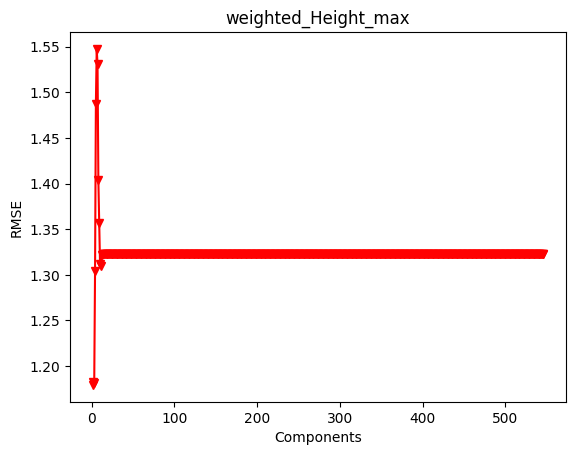

In [6]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#loop to calculate error
RMSE = []

for i in np.arange(1, x.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, x, log_y, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Visualization of results
plt.plot(np.arange(1, x.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Components')
plt.ylabel('RMSE')
plt.title('weighted_Height_max');

In [9]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(x,log_y,test_size=0.3,random_state=0) 

#calculate RMSE
pls = PLSRegression(n_components=20)
pls.fit(X_train, y_train)

np.sqrt(mean_squared_error(y_test, pls.predict(X_test)))

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:300: UserWarning: Y residual is constant at iteration 17
  warnings.warn(f"Y residual is constant at iteration {k}")


0.9583212991218896

In [10]:
from sklearn.metrics import r2_score
r2_score(y_test, pls.predict(X_test))

0.18484785153766103